Manuela Ardila Pineda

In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
solicitantes = pd.read_excel("/content/drive/MyDrive/Analítica de Negocios/0. SolicitantesCrédito.xlsx", sheet_name=0)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
solicitantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               8378 non-null   int64  
 1   Edad                     8378 non-null   int64  
 2   Sexo                     8378 non-null   object 
 3   Estado civil             8378 non-null   object 
 4   Hijos                    8378 non-null   int64  
 5   Perscargo                8378 non-null   int64  
 6   Estrato                  8378 non-null   int64  
 7   Nivel de estudios        8378 non-null   object 
 8   Tipo de contrato         8378 non-null   object 
 9   Ingresos                 8378 non-null   int64  
 10  Egresos                  8378 non-null   int64  
 11  Tipo de actividad        8378 non-null   object 
 12  Tipo de vivienda         8378 non-null   object 
 13  Total Activos            8378 non-null   float64
 14  Total pasivos           

In [3]:
solicitantes.shape

(8378, 35)

In [4]:
XD = solicitantes.dropna(subset='PreApr')

In [5]:
XD.shape

(5842, 35)

In [6]:
XD = XD [["Edad", "Hijos", "Perscargo", "Estrato", "Ingresos", "Egresos", "Monto (EAD)", "Plazo", "Cuota (COP)"]]
XD

,Edad,Hijos,Perscargo,Estrato,Ingresos,Egresos,Monto (EAD),Plazo,Cuota (COP)
0,38,1,0,3,5424576,7585302,2.815030e+06,48,82691.506204
1,51,6,1,4,1144064,1640079,6.301439e+05,36,22781.212598
2,37,2,0,3,2069853,2831440,1.280540e+06,36,46294.596244
3,29,1,0,2,1893080,2482276,1.393414e+06,24,69564.950015
4,42,3,4,2,3000367,3630221,2.252986e+06,24,112478.307883
...,...,...,...,...,...,...,...,...,...
8371,48,0,0,3,4831392,3392105,3.366188e+06,36,121695.762156
8373,31,2,0,5,5891088,4292158,3.918572e+06,48,115108.056436
8374,38,0,0,3,3092079,3028098,2.677266e+06,36,96789.562091
8375,43,1,2,2,2542007,3513112,1.375112e+06,36,49713.608249


In [7]:
yd = solicitantes["PreApr"].dropna()
yd

,PreApr
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
8371,1.0
8373,1.0
8374,1.0
8375,1.0


In [8]:
import numpy as np
XDArray = np.array(XD, dtype=float)
ydArray = np.array(yd, dtype=float)
print(XDArray)
print(ydArray)

[[3.80000000e+01 1.00000000e+00 0.00000000e+00 ... 2.81503004e+06
  4.80000000e+01 8.26915062e+04]
 [5.10000000e+01 6.00000000e+00 1.00000000e+00 ... 6.30143930e+05
  3.60000000e+01 2.27812126e+04]
 [3.70000000e+01 2.00000000e+00 0.00000000e+00 ... 1.28054021e+06
  3.60000000e+01 4.62945962e+04]
 ...
 [3.80000000e+01 0.00000000e+00 0.00000000e+00 ... 2.67726552e+06
  3.60000000e+01 9.67895621e+04]
 [4.30000000e+01 1.00000000e+00 2.00000000e+00 ... 1.37511242e+06
  3.60000000e+01 4.97136082e+04]
 [3.70000000e+01 1.00000000e+00 2.00000000e+00 ... 4.52536592e+06
  3.60000000e+01 1.63602819e+05]]
[1. 1. 0. ... 1. 1. 1.]


In [9]:
from sklearn.naive_bayes import GaussianNB

In [10]:
modelNB = GaussianNB()

In [11]:
modelNB.fit(XDArray, ydArray)

GaussianNB()

In [12]:
ydPred = modelNB.predict(XDArray)
ydPred

array([1., 0., 0., ..., 0., 0., 1.])

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [14]:
cm = confusion_matrix(ydArray, ydPred)
cm

array([[2539,  420],
       [1041, 1842]])

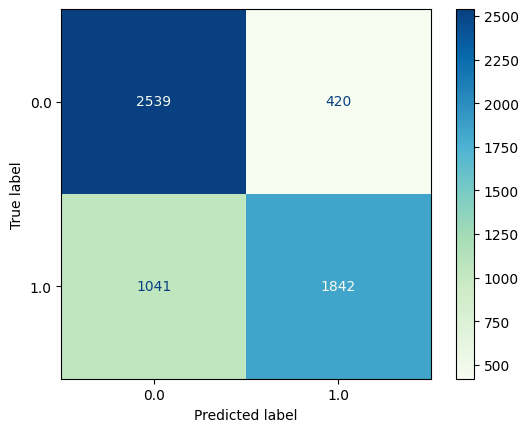

In [15]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelNB.classes_)

disp.plot(cmap="GnBu")
plt.show()

In [17]:
from re import S

# EValores de la matriz de confusión
VN=cm[0,0]; FP=cm[0,1]; FN=cm[1,0]; VP=cm[1,1]

# Exactitud (Acurracy)
exactitud=(VN+VP)/cm.sum()
print(f"La exactitud (accuracy) del modelo es de {exactitud:.2%}")

# Tasas de error
error = 1-exactitud
print(f"El error del modelo es de {error:.2%}")

# Precisión
presicion = VP/(VP+FP)
print(f"La precisión del modelo es de {presicion:.2%}")

# Sensibilidad
sensibilidad = VP/(VP+FN)
print(f"La sensibilidad del modelo es de {sensibilidad:.2%}")

# Especificidad
especificidad = VN/(VN+FP)
print(f"La especificidad del modelo es de {especificidad:.2%}")

La exactitud (accuracy) del modelo es de 74.99%
El error del modelo es de 25.01%
La precisión del modelo es de 81.43%
La sensibilidad del modelo es de 63.89%
La especificidad del modelo es de 85.81%


In [18]:
XDGener = solicitantes[solicitantes["PreApr"].isna()]

In [19]:
XDGener.shape

(2536, 35)

In [20]:
XDGener = XDGener [["Edad", "Hijos", "Perscargo", "Estrato", "Ingresos", "Egresos", "Monto (EAD)", "Plazo", "Cuota (COP)"]]
XDGener

,Edad,Hijos,Perscargo,Estrato,Ingresos,Egresos,Monto (EAD),Plazo,Cuota (COP)
6,38,3,0,3,1534711,1658694,7.913126e+05,60,2.009414e+04
7,47,0,0,2,136750,171155,1.213014e+05,48,3.563229e+03
11,46,0,1,4,7097220,9525257,3.174456e+06,3,1.090054e+06
13,37,4,2,2,1791987,1391431,2.334042e+06,48,6.856249e+04
16,22,1,0,2,2892545,3576891,1.887636e+06,36,6.824255e+04
...,...,...,...,...,...,...,...,...,...
8357,24,1,0,4,2433168,1518301,3.494059e+06,48,1.026380e+05
8358,66,1,0,1,83684,120852,3.822821e+04,24,1.908509e+03
8367,32,0,1,4,1133063,766199,1.013852e+06,36,3.665316e+04
8372,35,2,1,3,3073152,3812690,2.156239e+06,18,1.375805e+05


In [21]:
XDGenerArray = np.array(XDGener, dtype=float)

In [22]:
ydGener = modelNB.predict(XDGenerArray)
ydGener

array([0., 0., 1., ..., 0., 0., 0.])

In [23]:
ydGenerSerie = pd.Series(ydGener, index = solicitantes[solicitantes["PreApr"].isna()].index)
ydGenerSerie

,0
6,0.0
7,0.0
11,1.0
13,0.0
16,0.0
...,...
8357,0.0
8358,0.0
8367,0.0
8372,0.0


In [24]:
solicitantes["PreApr"].fillna(ydGenerSerie, inplace=True)

<ipython-input-24-c1357dc9852b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  solicitantes["PreApr"].fillna(ydGenerSerie, inplace=True)


In [25]:
solicitantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               8378 non-null   int64  
 1   Edad                     8378 non-null   int64  
 2   Sexo                     8378 non-null   object 
 3   Estado civil             8378 non-null   object 
 4   Hijos                    8378 non-null   int64  
 5   Perscargo                8378 non-null   int64  
 6   Estrato                  8378 non-null   int64  
 7   Nivel de estudios        8378 non-null   object 
 8   Tipo de contrato         8378 non-null   object 
 9   Ingresos                 8378 non-null   int64  
 10  Egresos                  8378 non-null   int64  
 11  Tipo de actividad        8378 non-null   object 
 12  Tipo de vivienda         8378 non-null   object 
 13  Total Activos            8378 non-null   float64
 14  Total pasivos           

- _Modelo 9 = Modelo con 9 variables socioeconómicas_.  
- _Modelo 4 = Modelo con 4 variables socioeconómicas_.  

# Análisis del Modelo 9 comparado con el Modelo 4     
- El Modelo 9 tiene una metrica de **exactitud** (74.99%) menor a la metrica de **exactitud** del Modelo 4 (76.14%), esto significa que la capacidad del modelo de analizar y clasificar los preaprobados y los prenegados disminuyó, es decir, es más propenso a cometer errores de clasificación, esto lo podemos comprobar al ver que la metrica **error** del Modelo 9 (25.01%) es mayor a la metrica **error** del Modelo 4 (23.86%).   

- En Modelo 9, la **precisión** mejoró (81.43%) comparado con la **presición** del Modelo 4 (81.01%), esto significa que cuando aprueba a un solicitante, tiene mayor certeza de que realmente califica _(ya que es una predicción positiva correcta)_, reduciendo los falsos positivos (420 vs 456).       
- Modelo 9 la **sensibilidad** (63.89%) disminuyó comparada con la **sensibilidad** del Modelo 4 (67.46%), esto significa que ahora rechaza más personas que sí deberían ser aprobadas _(ya que son el porcentaje de casos positivos detectados)_, aumentando los falsos negativos (1041 vs 938).    
- En el Modelo 9 la **especificidad** mejoró (85.81%) comparada con la **especificidad** del Modelo 4 (84.59%), esto significa que el modelo identifica mejor a quienes no deben ser aprobados. En general, es más estricto con la aprobación, pero a costa de rechazar más casos que sí calificaban _(Porcentaje de casos negativos detectados)_



In [26]:
solicitantes.to_excel("Clasificación Naive Bayes con nueve variables socioeconómicas.xlsx")